## IAB303 - Assignment 1 - Foundational Techniques

#### INSTRUCTIONS

1. Complete the section below with your personal details (and run the cell)
2. For each question, implement the full **QDAVI** data analytics cycle for the provided business concern. Ensure that you complete the cycle by addressing the question with your insights.
3. Ensure that you identify meaningful questions that clearly address each business concern.
4. Ensure that you use markdown cells to document your thinking and decision making for each stage of the process. Be clear on how your decisions are working towards addressing the question.
5. Ensure that your code runs without errors, and that your results are appropriate for the question.

**IMPORTANT:** ONLY SUBMIT YOUR BEST DATA ANALYTICS CYCLE FOR EACH ASSIGNMENT QUESTION. 
You are likely to need to do multiple data analytics cycles while exploring the data and working out the best insights. You could make a copy of this template to do exploratory analysis. Once you have found convincing insights for each business concern, you should select the best and submit 1 cycle for each business concern (Assignment Question).

In [42]:
# Complete the following cell with your details and run to produce your personalised header for this assignment

from IPython.display import display, HTML

first_name = 'Minjae'
last_name = 'Lee'
student_number = 'n11198885'

personal_header = "<h1>"+first_name+" "+last_name+" ("+student_number+")</h1>"
display(HTML(personal_header))

---
## Question 1 - Internal Concern

Your business is a boutique coffee roastery, and you sell a range of products to cafes and restaurants around Brisbane City. In order to plan how to grow your business, you have decided to analyse your last year of sales data. You would like to know what the sales data tells you about (a) the areas you sell to, (b) the products you are selling, and (c) what you should consider changing to grow your business.

#### Data:
Sales data is provided in the file: `coffee_sales.csv`

In [43]:
# import libraries that you need here

import pandas as pd
import plotly.express as px
from datetime import datetime

### 1. Question

*Write your question and interpretation of the business concern here*

### 1. How can we assess sales performance variations across different regions within Brisbane City based on our available sales data?

-To identify areas that are currently performing well and those that may require more attention, aiding us in resource allocation and tailoring our business approach for maximum effectiveness.

-By dissecting the sales data by region, we aim to pinpoint which areas emerged as high-performing hubs and which may have lagged behind. Because I think this information is invaluable as it helps us strategically allocate resources and tailor our business approach to maximize our presence and potential in thriving regions while addressing challenges in underperforming areas.


### 2. Did sales show any seasonal patterns in specific areas, and what might have caused these patterns?

-To plan season-specific marketing or inventory strategies.

-By dissecting seasonal variations, we aim to discern whether certain regions experienced spikes in demand during specific times of the year. Understanding these trends enables us to fine-tune our marketing strategies and inventory management, ensuring that we are well-prepared to meet the unique demands of each region during different seasons.

### 2. Data

In [44]:
# Load data
coffee_df = pd.read_csv('data/coffee_sales.csv')

# Clean/prepare the data for analysis.


#### To begin the data analysis process, I first conducted an evaluation of the data types within the dataset. Upon careful observation, it became apparent that the "Date" column exclusively featured day and month information, with the month entries being represented as text strings.

In [45]:
coffee_df.dtypes

Date        object
Zone        object
Area        object
Range       object
Product     object
Qty          int64
Price      float64
dtype: object

#### I checked and it was object type, with So I decided to change it to the datetime format

In [46]:
# This will be using for changing month(string) to numeric value
month_dict = {
    'Jan': '01', 'Feb': '02', 'Mar': '03', 'Apr': '04',
    'May': '05', 'Jun': '06', 'Jul': '07', 'Aug': '08',
    'Sep': '09', 'Oct': '10', 'Nov': '11', 'Dec': '12'
}

# Extract day and month, and concatenate with a last year 
coffee_df['Date'] = pd.to_datetime(coffee_df['Date'].str.split('-').apply(lambda x: f'2022-{month_dict[x[1]]}-{x[0]}'), format='%Y-%m-%d')

# Check the data type of the 'Date' column again to see if I changed it correctly
coffee_df.dtypes

Date       datetime64[ns]
Zone               object
Area               object
Range              object
Product            object
Qty                 int64
Price             float64
dtype: object

#### See the dataframe to double check

In [47]:
# To see changed value
coffee_df

,Date,Zone,Area,Range,Product,Qty,Price
0,2022-07-12,Northside,Fortitude Valley,Premium,2kg Single Origin Select,42,34.9
1,2022-12-15,Northside,Fortitude Valley,Premium,2kg Single Origin Select,41,34.9
2,2022-06-18,Northside,Fortitude Valley,Premium,2kg Single Origin Select,38,34.9
3,2022-10-04,Northside,Fortitude Valley,Premium,2kg Single Origin Select,38,34.9
4,2022-05-31,Northside,Fortitude Valley,Premium,2kg Single Origin Select,33,34.9
...,...,...,...,...,...,...,...
239,2022-12-21,Southside,Southbank,Standard,2kg Everyday Blend,29,16.8
240,2022-04-13,Southside,West End,Standard,2kg Everyday Blend,28,16.8
241,2022-06-24,Southside,Southbank,Standard,2kg Everyday Blend,28,16.8
242,2022-01-28,Northside,CBD,Standard,2kg Everyday Blend,28,13.5


#### To see if there are negative values

In [48]:
# To check whether this data's value is reliable and good to go
coffee_df.describe()

,Date,Qty,Price
count,244,244.000000,244.000000
mean,2022-07-01 13:58:01.967213056,63.286885,22.008197
min,2022-01-01 00:00:00,20.000000,13.500000
25%,2022-04-01 00:00:00,31.000000,17.700000
50%,2022-07-01 12:00:00,47.000000,18.700000
75%,2022-10-01 00:00:00,80.000000,28.400000
max,2022-12-30 00:00:00,306.000000,34.900000
std,NaN,47.112505,6.001688


#### To check if there are any missing values

In [49]:
# Check the missing values
coffee_df.isnull().sum()

Date       0
Zone       0
Area       0
Range      0
Product    0
Qty        0
Price      0
dtype: int64

### 3. Analysis

In [50]:
# Analyse the data - ensure that you at least use the required technique


#### 1. This analysis will help us answer the question about geographic performance.
#### We're aggregating sales data by Zone and Area to understand variations in sales across different regions within Brisbane City.
#### The 'Total_Sales' column now represents the total sales for each Zone and Area.

In [51]:
# Calculate total sales by Zone and Area to analyze geographic performance
area_sales = coffee_df.groupby(['Zone', 'Area'])['Price'].sum().reset_index()

# Rename the 'Price' column to 'Total_Sales' for clarity
area_sales.rename(columns={"Price": "Total_Sales"})

,Zone,Area,Total_Sales
0,Northside,CBD,1295.9
1,Northside,Fortitude Valley,2134.8
2,Southside,Southbank,1120.6
3,Southside,West End,818.7


#### 2. This analysis is essential for gaining insights into the products we sell, as per our questions.
#### We're aggregating sales data by Product Range and Product to understand the performance of each product.
#### The 'Total_Sales' column now represents the total sales for each Product Range and Product.

In [52]:
# Calculate total sales by Product Range and Product to analyze product-related insights
product_sales = coffee_df.groupby(['Range', 'Product'])['Price'].sum().reset_index()

# Rename the 'Price' column to 'Total_Sales' for clarity
product_sales.rename(columns={"Price": "Total_Sales"})

,Range,Product,Total_Sales
0,Barista,2kg Dark Blend,880.4
1,Barista,2kg Light Roast,617.1
2,Barista,2kg Smooth Blend,675.8
3,Cafe,2kg Cafe Blend,1132.8
4,Cafe,2kg Cafe Single Origin,504.9
5,Cafe,2kg Single Origin Custom,68.1
6,Premium,2kg Single Origin Select,907.4
7,Standard,2kg Everyday Blend,363.0
8,Standard,4kg Everyday Blend,220.5


#### 3. This step is crucial for understanding seasonal trends in sales, as per our questions.
#### Sorting the data by date allows us to examine how sales have evolved over time.
#### It's essential for identifying any season-specific patterns or trends that might exist in the sales data.

In [53]:
# Sort the sales data by date to analyze seasonal patterns
coffee_trend_by_season = coffee_df.sort_values("Date")
coffee_trend_by_season

,Date,Zone,Area,Range,Product,Qty,Price
216,2022-01-01,Northside,Fortitude Valley,Cafe,2kg Cafe Blend,33,17.7
80,2022-01-02,Northside,Fortitude Valley,Barista,2kg Smooth Blend,32,21.8
14,2022-01-04,Northside,Fortitude Valley,Premium,2kg Single Origin Select,87,34.9
174,2022-01-05,Northside,Fortitude Valley,Cafe,2kg Cafe Blend,63,17.7
144,2022-01-07,Southside,Southbank,Barista,2kg Light Roast,58,18.7
...,...,...,...,...,...,...,...
90,2022-12-24,Northside,CBD,Barista,2kg Smooth Blend,237,21.8
129,2022-12-27,Southside,Southbank,Cafe,2kg Cafe Single Origin,30,18.7
134,2022-12-27,Northside,CBD,Barista,2kg Light Roast,65,18.7
58,2022-12-30,Southside,Southbank,Barista,2kg Dark Blend,44,28.4


### 4. Visualisation

In [54]:
# Visualise the results


#### This visualization is essential for gaining insights into the areas we sell to, as per our questions.
#### By creating a bar chart, we can easily compare total sales across different areas and zones within Brisbane City.
#### The color-coded bars represent sales by Zone, providing a clear visual representation of sales performance in each area.

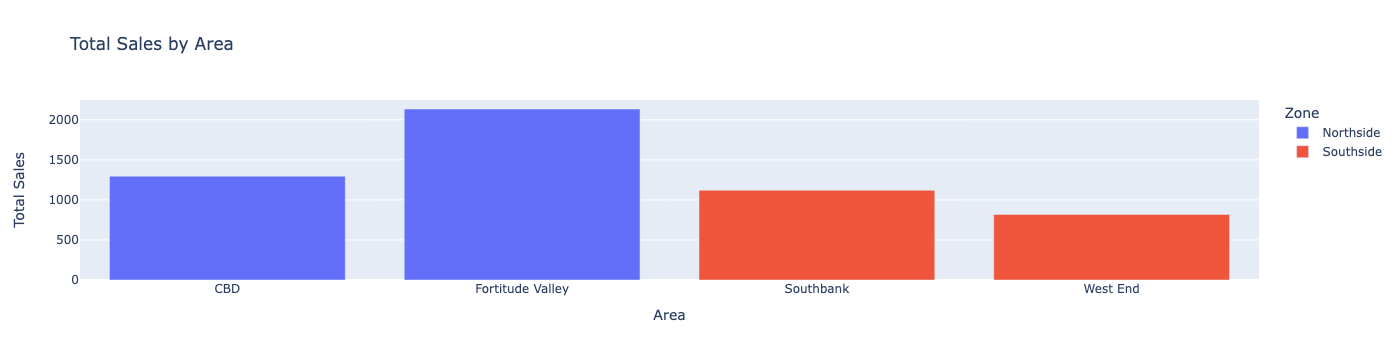

In [55]:
# Create a bar chart for geographic analysis to visualize total sales by Area and Zone
region_sales = px.bar(area_sales, x='Area', y='Price', color='Zone', title='Total Sales by Area')
region_sales.update_xaxes(title_text='Area')
region_sales.update_yaxes(title_text='Total Sales')

# Show the visualizations
region_sales.show()

#### These visualizations are essential for gaining insights into the products we sell, as per our questions.
#### The pie chart provides an overview of how sales are distributed among different product types within the range.
#### The bar chart breaks down sales by the product range, showing which products are performing the best.

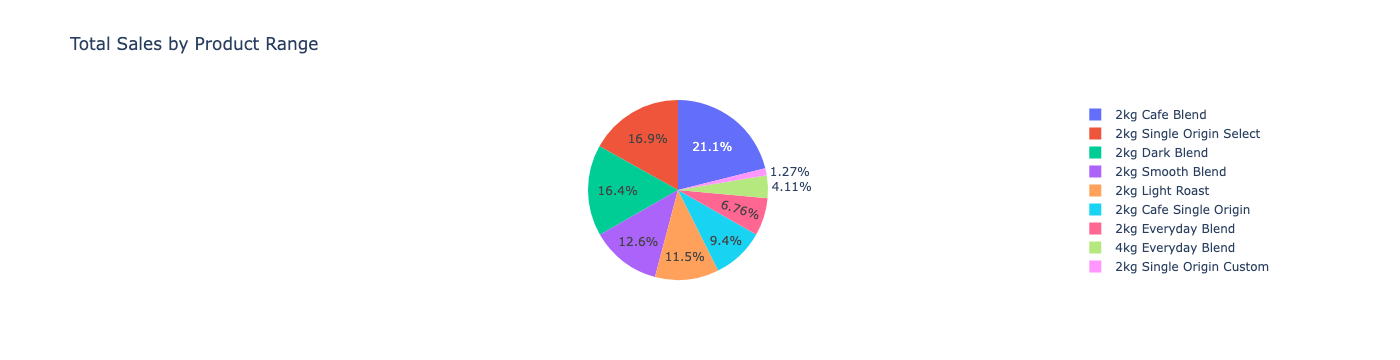

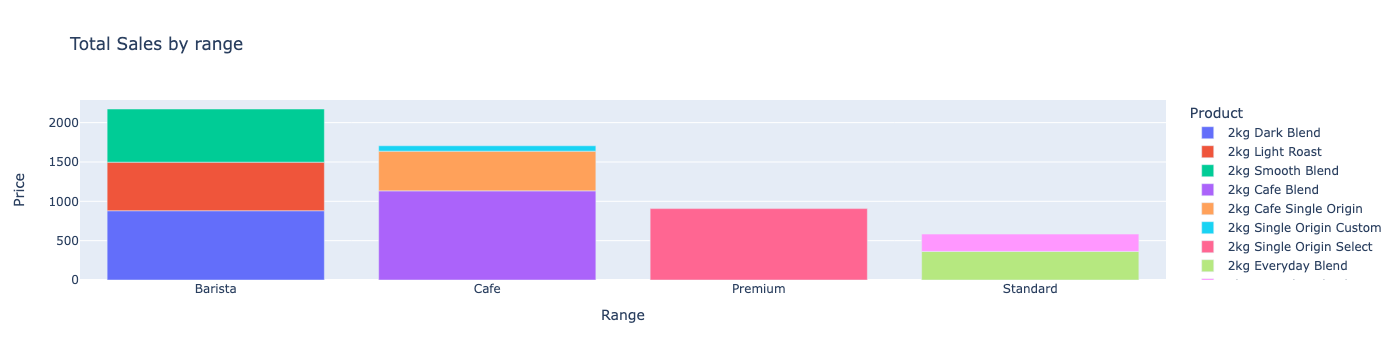

In [56]:
# Create a pie chart for product analysis to visualize the distribution of total sales by product
product_total_sales = px.pie(product_sales, values='Price', names='Product', title='Total Sales by Product Range')

# Create a bar chart for range analysis to visualize total sales by product range
range_sales = px.bar(product_sales, x='Range', y='Price', color='Product', title='Total Sales by range')

# Show the visualizations
product_total_sales.show()
range_sales.show()

#### This visualization is crucial for understanding how sales vary over months and across different areas.
#### The line chart provides insights into sales trends for each product, helping identify any seasonal patterns or area-specific trends.

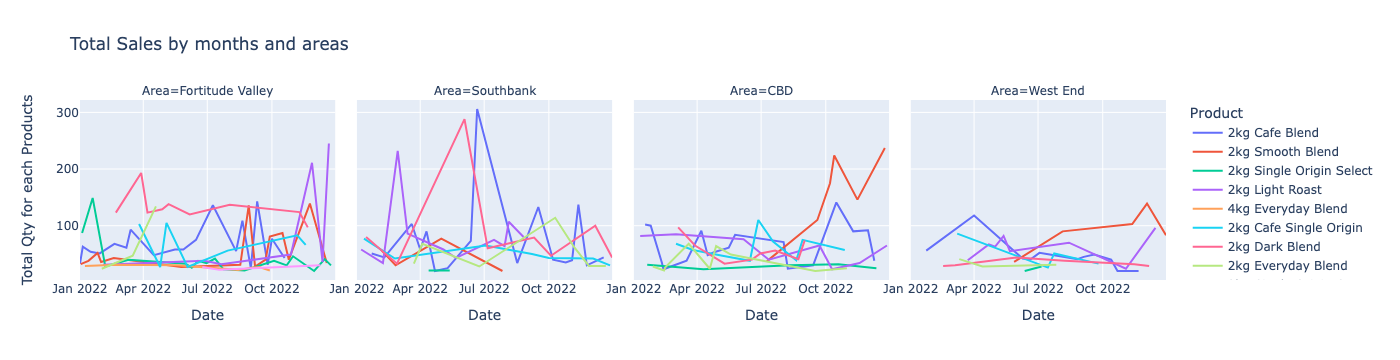

In [57]:
# Create a line chart to analyze total sales by months and areas, with separate lines for each product
seasons_total = px.line(coffee_trend_by_season, x = "Date", y = "Qty", color = "Product",
                       title = "Total Sales by months and areas", facet_col="Area", facet_col_wrap=4)

# Customize the y-axis title to reflect the total quantity for each product
seasons_total.update_layout(yaxis_title = "Total Qty for each Products")

# Show the visualizations
seasons_total.show()    

### 5. Insight

*Write your business insights drawn from the data analytics. Ensure that you clearly connect the business concern, the question, the analytics and the insights.*

### Which regions within Brisbane City are the top-performing in terms of coffee sales?
- The data analysis reveals that Fortitude Valley emerges as the top-performing area in Brisbane City, with the highest total sales. Southbank comes in third, closely followed by CBD with the second-highest overall sales. Even while West End is currently doing well, it ranks fourth in overall sales. With the help of these information, we can carefully deploy resources and adjust our business strategy to best leverage our presence and potential in Fortitude Valley, the CBD, and Southbank, three areas with strong sales. And this highlights the importance of focusing on Fortitude Valley for maximizing sales efforts.
### Which coffee product ranges are driving the highest total sales?
- The 2kg Cafe Blend range clearly stands out as the best-performing one, delivering the most significant amount of overall sales, according to the data analytics. The 2kg Single Origin Select, with the second-highest overall sales, is closely behind. The 2kg Smooth Blend comes in at number three, followed by the 2kg Light Roast at number four, and the 2kg Dark Blend at number three. Marketing plans and inventory management both depend on this information. It instructs us to adapt our strategy for the other product lines and concentrate resources and marketing efforts on promoting the 2kg Cafe Blend, which accounts for the majority of our sales.

### Which specific coffee products are performing exceptionally well in different areas, and during which months do they exhibit the highest sales?
- In Fortitude Valley, two standout products warrant attention due to their consistent high sales performance. These products are the 2kg Dark Blend and the 2kg Light Roast. The 2kg Dark Blend experienced its peak sales between February and April, while the 2kg Light Roast shone in November and December, outperforming all other products during those months. Conversely, the 2kg Single Origin Custom consistently showed the lowest sales across all months in this area.

- In Southbank, the spotlight falls on the 2kg Light Roast, 2kg Dark Blend, and 2kg Cafe Blend. The 2kg Light Roast achieved its highest sales at the end of February. Both the 2kg Dark Blend and 2kg Cafe Blend reached their peak sales in June. These insights suggest that these products should receive particular marketing attention during these months in Southbank.

- For CBD, the noteworthy products are the 2kg Smooth Blend and the 2kg Single Origin Select. The 2kg Smooth Blend experienced a sales peak in October, followed by another surge in December. In contrast, the 2kg Single Origin Select consistently displayed the lowest sales throughout the year. To maximize sales, it's essential to leverage the sales trends for the 2kg Smooth Blend and address the challenges faced by the 2kg Single Origin Select.

- West End showcased relatively lower sales for all products. While the 2kg Cafe Blend and 2kg Smooth Blend saw slight upticks in sales in April and December, respectively, these increases were not dramatic. West End, in general, maintained lower sales across all products. To boost sales in this area, a more comprehensive marketing and product strategy may be required.

- ##### From this we can maximize promotions for 2kg Cafe Blend, 2kg Smooth Blend, and products with high sales in specific months, address challenges faced by consistently low-performing products, and focus on Fortitude Valley for sales growth due to its consistently high sales.


---
## Question 2 - External Concern

Your business is a boutique coffee roastery, and you are interested in wheather general news about coffee is potentially helpful for you business. You are also looking for specific news that you can use to (a)promote the positives of drinking coffee, and (b) identify other products that could be good to sell with coffee.

#### Data:
[The Guardian OpenPlatform](https://open-platform.theguardian.com/access/)


In [58]:
# import libraries that you need here
import requests
import json
import re
import time
import pandas as pd

### 1. Question

*Write your question and interpretation of the business concern here*

- Is there any recent general news about coffee that may impact our business positively or negatively?

- Are there news articles that highlight the health benefits or positive aspects of drinking coffee?


### 2. Data

In [59]:
# Access the data via API

#load my personal API key
with open('private/guardian_key.txt', 'r') as file:
    key = file.read().strip()
len(key)

# Clean/prepare the data for analysis

36

In [60]:
# build a search URL
base_url = 'https://content.guardianapis.com/'

# modify your search terms & filters
search_string = "coffee benefit"
from_date = '2023-05-29'
to_date = '2023-08-22'
show_field = 'body'



# this is an example of a search URL
full_url = base_url+f"search?q={search_string}&from-date={from_date}&to_date={to_date}&show-fields={show_field}&api-key={key}"

In [61]:
# get data from server
response = requests.get(full_url)
resp_data = response.json()['response']
resp_data

{'status': 'ok',
 'userTier': 'developer',
 'total': 442,
 'startIndex': 1,
 'pageSize': 10,
 'currentPage': 1,
 'pages': 45,
 'orderBy': 'relevance',
 'results': [{'id': 'food/2023/jun/28/how-to-make-coffee-granita-recipe-felicity-cloake',
   'type': 'article',
   'sectionId': 'food',
   'sectionName': 'Food',
   'webPublicationDate': '2023-06-28T10:00:02Z',
   'webTitle': "How to make coffee granita – recipe | Felicity Cloake's Masterclass",
   'webUrl': 'https://www.theguardian.com/food/2023/jun/28/how-to-make-coffee-granita-recipe-felicity-cloake',
   'apiUrl': 'https://content.guardianapis.com/food/2023/jun/28/how-to-make-coffee-granita-recipe-felicity-cloake',
   'fields': {'body': '<p>When it’s too hot even for ice-cream, the icy shards of granita come into their own. <a href="https://www.theguardian.com/profile/marcella-hazan">Marcella Hazan</a> describes the coffee variety as one of the best ways to while away a sunny afternoon, “watching life dawdle by as you let the … crysta

In [62]:
# Count number of pages
num_pages = resp_data['pages']
num_pages

45

In [63]:
def articles_from_page_results(page_results):
    articles = {}
    for result in page_results:
        article_date = result['webPublicationDate']
        article_title = result['webTitle']+f" [{article_date}]"
        article_html = result['fields']['body']
        article_text = re.sub(r'<.*?>','',article_html)
        articles[article_title] = article_text
    return articles

In [64]:
def get_all_articles_for_response(response_json,full_url):
    total_pages = response_json['pages']
    total_articles = response_json['total']
    print(f"Fetching {total_articles} articles from {total_pages} pages...")
    all_articles = {}
    page1_articles = articles_from_page_results(response_json['results'])
    all_articles.update(page1_articles)
    print("Added articles for page: 1")
    
    for page in range(2,total_pages+1):
        print("Getting articles from API for page:",page)
        page_response = requests.get(full_url+f"&page={page}")
        page_data = page_response.json()['response']
        print("Processing results for page:",page_data['currentPage'])
        page_articles = articles_from_page_results(page_data['results'])
        print(f"Fetched {len(page_articles)} articles.")
        all_articles.update(page_articles)
        print("Added articles for page:",page)
        print(f"Status: {len(all_articles)} articles.")
        time.sleep(1) # make sure we're not hitting the API to hard
    
    print(f"FINISHED: Fetched {len(all_articles)} articles.")
    return all_articles


In [65]:
my_articles = get_all_articles_for_response(resp_data,full_url)

Fetching 442 articles from 45 pages...
Added articles for page: 1
Getting articles from API for page: 2
Processing results for page: 2
Fetched 10 articles.
Added articles for page: 2
Status: 20 articles.
Getting articles from API for page: 3
Processing results for page: 3
Fetched 10 articles.
Added articles for page: 3
Status: 30 articles.
Getting articles from API for page: 4
Processing results for page: 4
Fetched 10 articles.
Added articles for page: 4
Status: 40 articles.
Getting articles from API for page: 5
Processing results for page: 5
Fetched 10 articles.
Added articles for page: 5
Status: 50 articles.
Getting articles from API for page: 6
Processing results for page: 6
Fetched 10 articles.
Added articles for page: 6
Status: 60 articles.
Getting articles from API for page: 7
Processing results for page: 7
Fetched 10 articles.
Added articles for page: 7
Status: 70 articles.
Getting articles from API for page: 8
Processing results for page: 8
Fetched 10 articles.
Added articles f

In [66]:
# Print first 19 of articles 
print("Total Articles:", len(my_articles))
count = 0  # Initialize a count variable to keep track of the number of articles printed
for title, text in my_articles.items():
    if count < 20:  # Check if you've printed less than 20 articles
        print(title)
        count += 1  # Increment the count
    else:
        break

Total Articles: 441
How to make coffee granita – recipe | Felicity Cloake's Masterclass [2023-06-28T10:00:02Z]
Male bonding over coffee and chess | Letter [2023-05-29T16:17:53Z]
Avocado, coffee, fajitas: the food guru fuelling the Matildas’ dreams [2023-07-22T20:00:22Z]
Benefit cap punishes children by forcing them into poverty | Letters [2023-08-11T17:01:53Z]
Full of beans: scientists use processed coffee grounds to make stronger concrete [2023-08-22T15:00:02Z]
Keir Starmer must scrap the two-child benefit cap | Letters [2023-07-18T16:58:05Z]
Labour under pressure to axe two-child benefit limit [2023-07-02T07:00:35Z]
Tim Dowling: I am talking to the coffee machine. And yes, it’s listening [2023-08-19T05:00:09Z]
Kamala Harris condemns Florida over curriculum claim of slavery ‘benefit’ [2023-07-21T20:47:47Z]
Labour would keep two-child benefit cap, says Keir Starmer [2023-07-16T23:18:46Z]
Benefit backlog costing disabled people £24m a month, says Citizens Advice [2023-08-15T06:00:37Z]
J

### 3. Analysis

In [67]:
# My dictionary of articles (my_articles)
my_articles_count_pos = {
    "How to make coffee granita – recipe | Felicity Cloake's Masterclass",
    "Male bonding over coffee and chess | Letter",
    "Avocado, coffee, fajitas: the food guru fuelling the Matildas’ dreams",
    "Benefit cap punishes children by forcing them into poverty | Letters",
    "Full of beans: scientists use processed coffee grounds to make stronger concrete",
    "Tim Dowling: I am talking to the coffee machine. And yes, it’s listening",
    "Keir Starmer must scrap the two-child benefit cap | Letters",
    "Labour under pressure to axe two-child benefit limit",
    "Benefit backlog costing disabled people £24m a month, says Citizens Advice",
    "Just 5% of private rentals affordable on housing benefit",
    "Labour MPs ‘seething’ over Starmer’s child benefit stance, says Corbyn",
    "Michael Imperioli: ‘I still give Morrissey the benefit of the doubt",
    "Arizona woman accused of trying to kill husband by lacing coffee with bleach",
    "California shores up beaver protection in nod to their ‘ecological benefit",
    "Inside Britain’s tiniest places: ‘It’s an engineering work of art … with coffee",
    "Battle over two-child benefit cap looms at Labour policy event",
    "How much? Edith Pritchett on paying £5.20 for an iced coffee – cartoon",
    "Keir Starmer defends decision not to scrap two-child benefit cap"
}


In [68]:
# Organise my dictionary of articles
my_articles_count_pos = {
    'positive':["Male bonding over coffee and chess | Letter",
                "Full of beans: scientists use processed coffee grounds to make stronger concrete",
                "Inside Britain’s tiniest places: ‘It’s an engineering work of art … with coffee"],
    'negative':["Arizona woman accused of trying to kill husband by lacing coffee with bleach"],
    'irrelevent of pros and cons': ["How to make coffee granita – recipe | Felicity Cloake's Masterclass",
                                    "Avocado, coffee, fajitas: the food guru fuelling the Matildas’ dreams",
                                    "Benefit cap punishes children by forcing them into poverty | Letters",
                                    "Full of beans: scientists use processed coffee grounds to make stronger concrete",
                                    "Tim Dowling: I am talking to the coffee machine. And yes, it’s listening",
                                    "Keir Starmer must scrap the two-child benefit cap | Letters",
                                    "Labour under pressure to axe two-child benefit limit",
                                    "Benefit backlog costing disabled people £24m a month, says Citizens Advice",
                                    "Just 5% of private rentals affordable on housing benefit",
                                    "Labour MPs ‘seething’ over Starmer’s child benefit stance, says Corbyn",
                                    "Michael Imperioli: ‘I still give Morrissey the benefit of the doubt",
                                    "California shores up beaver protection in nod to their ‘ecological benefit",
                                    "Battle over two-child benefit cap looms at Labour policy event",
                                    "How much? Edith Pritchett on paying £5.20 for an iced coffee – cartoon",
                                    "Keir Starmer defends decision not to scrap two-child benefit cap"]
}
    

    
    

In [69]:
# Count my dictionary of articles
my_articles_count_pos = {
    'article senti':['positive','negative','irrelevant'],
    'count':[3,1,15]
}

my_articles_count_pos = pd.DataFrame(my_articles_count_pos)

In [70]:
my_articles_count_pos

,article senti,count
0,positive,3
1,negative,1
2,irrelevant,15


### 4. Visualisation

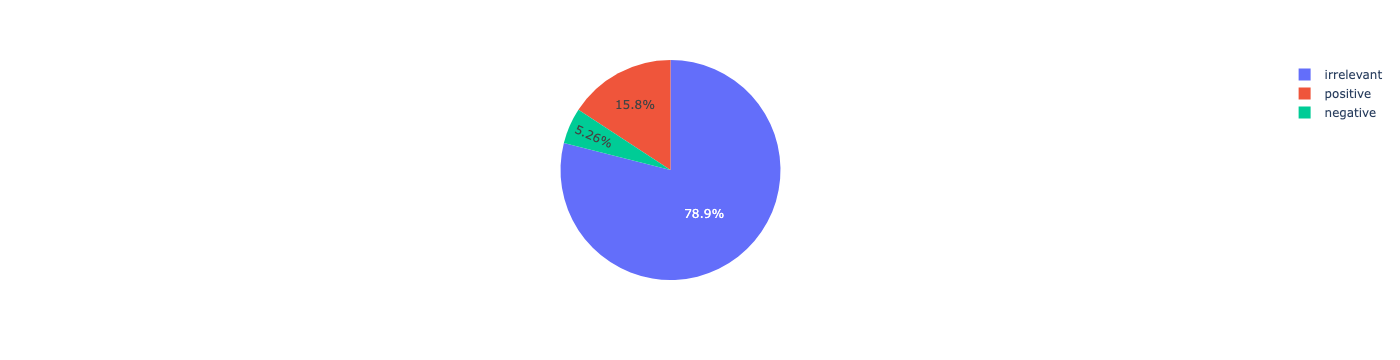

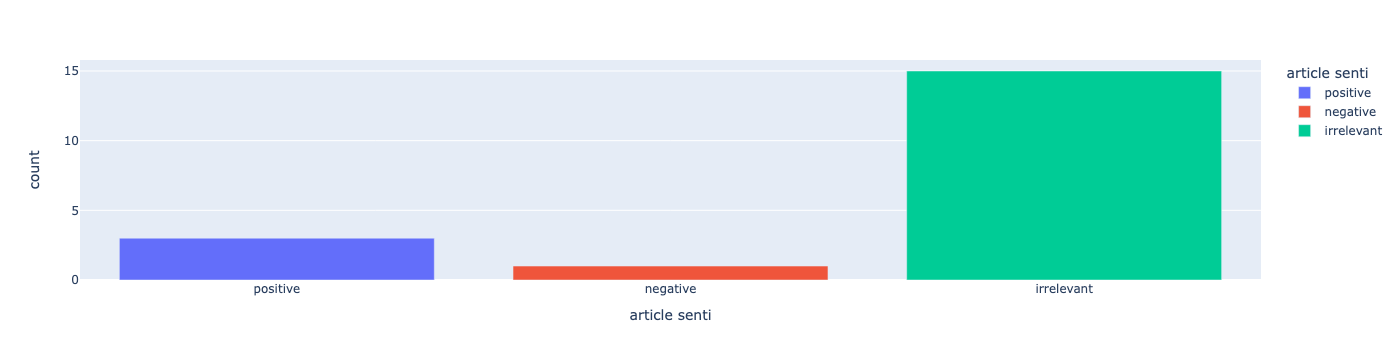

In [71]:
# Create a Pie Chart
my_articles_count_pie = px.pie(my_articles_count_pos, values='count', names='article senti')

# Create a bar chart 
my_articles_count_bar = px.bar(my_articles_count_pos, x='article senti', y='count', color='article senti')

# Visualize
my_articles_count_pie.show()
my_articles_count_bar.show()

### 5. Insight

*Write your business insights drawn from the data analytics. Ensure that you clearly connect the business concern, the question, the analytics and the insights.*

#### The benefit of coffee seems way more less than irrelevant but have more than negative.

- Positive news about coffee, whether related to health benefits or happiness, can be used to create compelling marketing campaigns and attract customers seeking these benefits.

- Exploring coffee's unconventional uses, such as strengthening concrete, may lead to unique product ideas or collaborations that set our roastery apart from competitors.

- Identifying complementary products like coffee granita, avocado, fajitas, and coffee machines allows us to diversify our menu and cater to a broader customer base.